In [22]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import confusion_matrix  
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
%matplotlib inline
from sklearn.linear_model import LogisticRegression
from joblib import dump
from sklearn.ensemble import RandomForestClassifier

In [23]:
df=pd.read_csv("Breast_cancer_data.csv")
names = ['mean_radius','mean_texture','mean_perimeter','mean_area','mean_smoothness','diagnosis']
df.columns = names
print(df.head())
print(df.info())
df.describe()

   mean_radius  mean_texture  mean_perimeter  mean_area  mean_smoothness  \
0        19.69         21.25          130.00     1203.0           0.1096   
1        11.42         20.38           77.58      386.1           0.1425   
2        20.29         14.34          135.10     1297.0           0.1003   
3        12.45         15.70           82.57      477.1           0.1278   
4        13.08         15.71           85.63      520.0           0.1075   

   diagnosis  
0          0  
1          0  
2          0  
3          0  
4          1  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 568 entries, 0 to 567
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   mean_radius      568 non-null    float64
 1   mean_texture     568 non-null    float64
 2   mean_perimeter   568 non-null    float64
 3   mean_area        568 non-null    float64
 4   mean_smoothness  568 non-null    float64
 5   diagnosis        568 n

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,diagnosis
count,568.000000,568.000000,568.000000,568.000000,568.000000,568.000000
mean,14.120491,19.305335,91.914754,654.279754,0.096321,0.628521
std,3.523416,4.288506,24.285848,351.923751,0.014046,0.483626
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.000000
25%,11.697500,16.177500,75.135000,420.175000,0.086290,0.000000
50%,13.355000,18.855000,86.210000,548.750000,0.095865,1.000000
75%,15.780000,21.802500,103.875000,782.625000,0.105300,1.000000
max,28.110000,39.280000,188.500000,2501.000000,0.163400,1.000000


In [24]:
print(df['diagnosis'].value_counts())

1    357
0    211
Name: diagnosis, dtype: int64


sns.heatmap(df.corr(),annot=True)

# training logistic regression model

# splitting the dataset and standardising it

In [25]:
x=df[['mean_radius','mean_texture','mean_perimeter','mean_area','mean_smoothness']]
y = df['diagnosis']
standardise = StandardScaler()
x_train, x_test, y_train, y_test=train_test_split(x,y,test_size=0.2, random_state=10) #splitting
print("Number of rows in x_train:", x_train.shape[0])
print("Number of rows in x_test:", x_test.shape[0])
print("Number of rows in y_train:", y_train.shape[0])
print("Number of rows in y_test:", y_test.shape[0])
x_train= standardise.fit_transform(x_train)
x_test= standardise.transform(x_test)

Number of rows in x_train: 454
Number of rows in x_test: 114
Number of rows in y_train: 454
Number of rows in y_test: 114


In [26]:
model= LogisticRegression()
model.fit(x_train,y_train)

LogisticRegression()

In [27]:
model.predict_proba(x_test)

array([[5.60652514e-04, 9.99439347e-01],
       [9.99973667e-01, 2.63327549e-05],
       [3.32891167e-03, 9.96671088e-01],
       [8.97087568e-01, 1.02912432e-01],
       [7.19059694e-04, 9.99280940e-01],
       [9.99964619e-01, 3.53805913e-05],
       [1.77352986e-03, 9.98226470e-01],
       [7.55780244e-01, 2.44219756e-01],
       [9.99997417e-01, 2.58268537e-06],
       [9.94657427e-01, 5.34257252e-03],
       [9.99993059e-01, 6.94104624e-06],
       [9.98554422e-01, 1.44557763e-03],
       [5.05539393e-04, 9.99494461e-01],
       [2.39854504e-02, 9.76014550e-01],
       [9.99790109e-01, 2.09890904e-04],
       [5.89235635e-01, 4.10764365e-01],
       [2.07556266e-03, 9.97924437e-01],
       [7.34101965e-03, 9.92658980e-01],
       [9.95865703e-01, 4.13429696e-03],
       [3.98262651e-02, 9.60173735e-01],
       [9.99723470e-01, 2.76530168e-04],
       [1.31066806e-02, 9.86893319e-01],
       [9.99998099e-01, 1.90062022e-06],
       [9.99962396e-01, 3.76041648e-05],
       [1.407444

In [28]:
model.predict(x_test)

array([1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1,
       0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0,
       0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0,
       0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1,
       1, 1, 0, 1], dtype=int64)

In [29]:
model.score(x_test,y_test)

0.9298245614035088

In [30]:
dump(model, './../savedModels/model.joblib')
dump(standardise,'./../savedModels/scaler.joblib')

['./../savedModels/model.joblib']

# using random forest

In [32]:
model2= RandomForestClassifier()

In [33]:
model2.fit(x_train, y_train)

RandomForestClassifier()

In [34]:
model2.predict_proba(x_test)

array([[0.04, 0.96],
       [1.  , 0.  ],
       [0.  , 1.  ],
       [0.69, 0.31],
       [0.  , 1.  ],
       [1.  , 0.  ],
       [0.01, 0.99],
       [0.83, 0.17],
       [1.  , 0.  ],
       [1.  , 0.  ],
       [1.  , 0.  ],
       [1.  , 0.  ],
       [0.  , 1.  ],
       [0.05, 0.95],
       [1.  , 0.  ],
       [0.16, 0.84],
       [0.03, 0.97],
       [0.  , 1.  ],
       [0.98, 0.02],
       [0.02, 0.98],
       [1.  , 0.  ],
       [0.02, 0.98],
       [1.  , 0.  ],
       [1.  , 0.  ],
       [0.  , 1.  ],
       [0.75, 0.25],
       [1.  , 0.  ],
       [0.04, 0.96],
       [0.  , 1.  ],
       [1.  , 0.  ],
       [0.95, 0.05],
       [0.01, 0.99],
       [0.  , 1.  ],
       [1.  , 0.  ],
       [0.23, 0.77],
       [1.  , 0.  ],
       [0.  , 1.  ],
       [0.02, 0.98],
       [0.33, 0.67],
       [0.09, 0.91],
       [1.  , 0.  ],
       [0.85, 0.15],
       [1.  , 0.  ],
       [0.05, 0.95],
       [0.  , 1.  ],
       [0.04, 0.96],
       [0.  , 1.  ],
       [0.  ,

In [35]:
model2.predict(x_test)

array([1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1,
       0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0,
       0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1,
       1, 1, 1, 1], dtype=int64)

In [36]:
model2.score(x_test,y_test)

0.9210526315789473

# training knn on all features

x=df[['mean_radius','mean_texture','mean_perimeter','mean_area','mean_smoothness']]
y = df['diagnosis']

x_train, x_test, y_train, y_test=train_test_split(x,y,test_size=0.2, random_state=10) #splitting

x_train= standardise.fit_transform(x_train)
x_test= standardise.transform(x_test)

[0.8947368421052632, 0.8859649122807017, 0.9035087719298246, 0.9035087719298246, 0.9035087719298246, 0.9035087719298246, 0.9122807017543859, 0.9122807017543859, 0.9122807017543859]


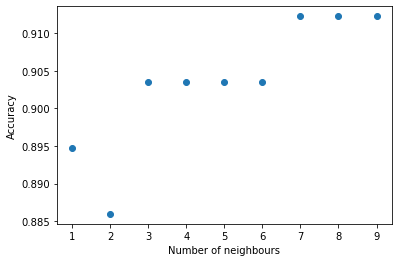

In [37]:
#using KNN to select the no. of neighbours for which there is maximum accuracy
accuracy = []
num_neigh = []

 
for ii in range(1,10):
    KNN = KNeighborsClassifier(n_neighbors=ii)
    KNN.fit(x_train,y_train)
    accuracy.append(KNN.score(x_test,y_test))
    num_neigh.append(ii)

print(accuracy)
plt.scatter(num_neigh,accuracy)
plt.xlabel('Number of neighbours')
plt.ylabel('Accuracy')
plt.show();

In [38]:
KNN = KNeighborsClassifier(n_neighbors=7)
KNN = KNN.fit(x_train,y_train)
y_predict = KNN.predict(x_test)
print(y_predict)

[1 0 1 1 1 0 1 0 0 0 0 0 1 1 0 1 1 1 0 1 0 1 0 0 1 1 0 1 1 0 0 1 1 0 1 0 1
 1 1 1 0 0 0 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 0 1 1 1 0 1 0 0 1 1 1 1 0 1 1
 1 1 1 0 1 1 1 1 0 1 1 1 1 0 0 1 0 0 1 1 1 1 0 0 0 0 0 0 1 1 0 1 1 0 0 1 1
 1 0 1]


In [39]:
print(confusion_matrix(y_test, y_predict))

[[39  7]
 [ 3 65]]


<AxesSubplot:xlabel='Predicted', ylabel='Actual'>

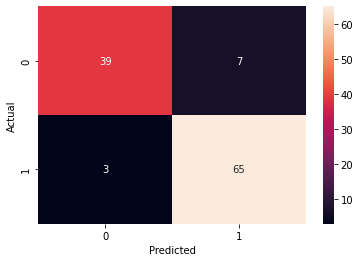

In [40]:
df = pd.DataFrame()


#df['Actual'] = y_test.argmax(axis=1)
#df['Predicted'] = y_predict.argmax(axis=1)

#freq = pd.crosstab(df.Actual,df.Predicted)


#sns.heatmap(freq,annot=True,fmt="d")


# Create new columns within dataframe
df['Actual'] = y_test
df['Predicted'] = y_predict

# Use pd.crosstab to count the frequency of the classes in actual and predicted
freq = pd.crosstab(df.Actual,df.Predicted)

# Use sns.heatmap to plot the heatmap
sns.heatmap(freq,annot=True,fmt="d")

# training knn model first on two features 

x1=df[['mean_perimeter','mean_area']]
y = df['diagnosis']
standardise = StandardScaler()
x_train, x_test, y_train, y_test=train_test_split(x1,y,test_size=0.2, random_state=10) #splitting
print("Number of rows in x_train:", x_train.shape[0])
print("Number of rows in x_test:", x_test.shape[0])
print("Number of rows in y_train:", y_train.shape[0])
print("Number of rows in y_test:", y_test.shape[0])
x_train= standardise.fit_transform(x_train)
x_test= standardise.transform(x_test)

accuracy = []
num_neigh = []

 
for ii in range(1,10):
    KNN = KNeighborsClassifier(n_neighbors=ii)
    KNN.fit(x_train,y_train)
    accuracy.append(KNN.score(x_test,y_test))
    num_neigh.append(ii)

print(accuracy)
plt.scatter(num_neigh,accuracy)
plt.xlabel('Number of neighbours')
plt.ylabel('Accuracy')
plt.show();

KNN = KNeighborsClassifier(n_neighbors=6)
KNN = KNN.fit(x_train,y_train)
y_predict = KNN.predict(x_test)
print(y_predict)

print(confusion_matrix(y_test, y_predict))

df = pd.DataFrame()

df['Actual'] = y_test
df['Predicted'] = y_predict

freq = pd.crosstab(df.Actual,df.Predicted)

sns.heatmap(freq,annot=True,fmt="d")

#training the model on all the features
KNN=KNeighborsClassifier()


x=df[['mean_radius','mean_texture','mean_perimeter','mean_area','mean_smoothness']]
y = df['diagnosis']


KNN=KNN.fit(x,y)

test=pd.DataFrame()

test['mean_radius']=[13.37, 25]
test['mean_texture']=[15.2, 20.88]
test['mean_perimeter']=[90,140]
test['mean_area']=[400, 1200]
test['mean_smoothness']=[0.09763, 0.2]

result=KNN.predict(test)

print(result)


y = to_categorical(y)
print(y)

# using sequential model

In [51]:
model3= Sequential()

model3.add(Dense(5,input_dim=5,activation='relu'))
model3.add(Dense(5,activation='relu'))
model3.add(Dense(5,activation='relu'))
model3.add(Dense(2,activation='softmax'))

model3.compile(optimizer='adam',loss='binary_crossentropy', metrics=['accuracy'])
print(model3.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 5)                 30        
_________________________________________________________________
dense_1 (Dense)              (None, 5)                 30        
_________________________________________________________________
dense_2 (Dense)              (None, 5)                 30        
_________________________________________________________________
dense_3 (Dense)              (None, 2)                 12        
Total params: 102
Trainable params: 102
Non-trainable params: 0
_________________________________________________________________
None


In [52]:
model3.fit(x_train,y_train,epochs=30,shuffle=True,validation_data=(x_test,y_test), batch_size=1)

Epoch 1/30
454/454 [==============================] - 1s 3ms/step - loss: 0.6932 - accuracy: 0.4273 - val_loss: 0.6932 - val_accuracy: 0.4825
Epoch 2/30
454/454 [==============================] - ETA: 0s - loss: 0.6932 - accuracy: 0.45 - 1s 2ms/step - loss: 0.6932 - accuracy: 0.4758 - val_loss: 0.6932 - val_accuracy: 0.6667
Epoch 3/30
454/454 [==============================] - 1s 2ms/step - loss: 0.6932 - accuracy: 0.5176 - val_loss: 0.6932 - val_accuracy: 0.3947
Epoch 4/30
454/454 [==============================] - 1s 3ms/step - loss: 0.6932 - accuracy: 0.4934 - val_loss: 0.6932 - val_accuracy: 0.4298
Epoch 5/30
454/454 [==============================] - 1s 3ms/step - loss: 0.6932 - accuracy: 0.5286 - val_loss: 0.6932 - val_accuracy: 0.5877
Epoch 6/30
454/454 [==============================] - 1s 2ms/step - loss: 0.6931 - accuracy: 0.4912 - val_loss: 0.6932 - val_accuracy: 0.6491
Epoch 7/30
454/454 [==============================] - 1s 2ms/step - loss: 0.6931 - accuracy: 0.5308 - val_

# imported the testing dataset and standardised it

In [41]:
df2=pd.read_csv("./testing.csv", header=None)
names= ['mean_radius','mean_texture','mean_perimeter','mean_area','mean_smoothness']
df2.columns = names

In [42]:
testing_features=df2[['mean_radius','mean_texture','mean_perimeter','mean_area','mean_smoothness']]
testing_features_standardised= standardise.fit_transform(testing_features)
print(testing_features_standardised)

[[ 0.45956662  1.76406205  0.6233398   0.4923545  -0.26496643]
 [ 1.40997926 -1.1544824   1.38991158  1.61814372  0.73251329]
 [-0.10105653 -0.4713328   0.24577071 -0.07892285  0.6927136 ]
 [-0.10105653 -0.4713328  -1.31335834 -0.82961582  0.6927136 ]
 [-1.66743281  0.33308596 -0.94566374 -1.20195954 -1.85297405]]


# using logistic regression on the testing data

In [43]:
resulting_class = model.predict(testing_features_standardised)
print(resulting_class)

[0 0 1 1 1]


#tumor_type = []
#for ii in range(0,resulting_class.shape[0]):
#tumor_type.append(np.argmax(resulting_class[ii,:]))
#print(tumor_type)

# used sequential model on testing data

resulting_class = model3.predict(testing_features_standardised)
print(resulting_class)

tumor_type = []
for ii in range(0,resulting_class.shape[0]):
    tumor_type.append(np.argmax(resulting_class[ii,:]))
print(tumor_type)